# Problem 1: K-Nearest Neighbors
Create  a 2-dimensional  data set  with  30  samples that  has the following  properties
1. Samples  should belong to  2  classes (15  samples per  class)
2. Using  a Logistic Regression  classifier,  all  samples from  both  classes can  be correctly  classified
3. Using  a K-NN classifier,  with  K=3,  two  samples from  each  class  will  always be misclassified. The remaining  26  can  be classified correctly.

Generate a scatter  plot  of  your  data.  Use a different  color/symbol  for  each  class.  Indicate  the  4  samples that  cannot  be  classified  correctly  using  the  KNN  and explain the  reasons.

Note:  This  data  should  be  generated  manually  and  you  do not  need to run  any  code  on  it


In [157]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from numpy import random
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

random.seed(42)


def generate_neighborhood_in_rectangle(
        class_name,
        neighbor_count,
        x_min,
        x_max,
        y_min,
        y_max,
):
    items = []
    X_set = []
    y_set = []
    for i in range(0, neighbor_count):
        feature_1 = random.randint(x_min, x_max)
        feature_2 = random.randint(y_min, y_max)
        # item = {'class': class_name, 'x': x, 'y': y}
        item = [class_name, feature_1, feature_2]
        X_set.append([feature_1, feature_2])
        y_set.append(class_name)

    neighborhood = pd.DataFrame(items, columns=['Class', 'f1', 'f2'])

    return np.array(X_set), np.array(y_set)


def split_X_y(neighborhood):
    y = pd.DataFrame(neighborhood.Class, columns=['Class'])
    X = pd.DataFrame(
        [
            neighborhood,
            neighborhood.f2
        ], columns=['f1', 'f2']
    )
    return X, y

[[6 3]
 [7 4]
 [6 9]
 [2 6]
 [7 4]
 [3 7]
 [7 2]
 [5 4]
 [1 7]
 [5 1]
 [4 0]
 [9 5]
 [8 0]]
['alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha'
 'alpha' 'alpha' 'alpha' 'alpha']
[]
[[6 3]]


Text(0, 0.5, 'Feature: Y')

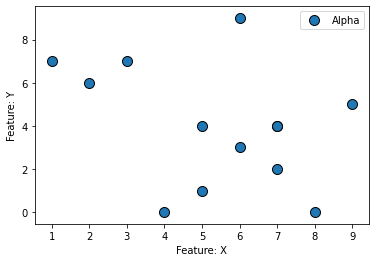

In [82]:
random.seed(42)

X, y = generate_neighborhood_in_rectangle('alpha', 13, 0, 10, 0, 10)
print(X)
print(y)

print(X[:0])
print(X[:1])
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Alpha'])
plt.xlabel('Feature: X')
plt.ylabel('Feature: Y')

Text(0, 0.5, 'Feature 2')

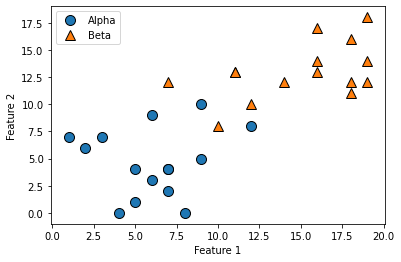

In [154]:
random.seed(42)

class_A_X, class_A_y = generate_neighborhood_in_rectangle('alpha', 13, 0, 10, 0, 10)
class_B_X, class_B_y = generate_neighborhood_in_rectangle('beta', 13, 10, 20, 10, 20)
X_train = np.concatenate((class_A_X, class_B_X))
y_train = np.concatenate((class_A_y, class_B_y))

# create the misclassified examples
misclassified_beta_1 = [10, 8]
misclassified_beta_2 = [7, 12] # done
misclassified_alpha_1 = [9, 10] # done
misclassified_alpha_2 = [12, 8] # done
X_train = np.append(
    X_train,
    [misclassified_beta_1, misclassified_beta_2,
        misclassified_alpha_1, misclassified_alpha_2],
    axis=0
)
# np.append(X_train, misclassified_beta_2)
y_train = np.append(y_train, 'beta')
y_train = np.append(y_train, 'beta')
y_train = np.append(y_train, 'alpha')
y_train = np.append(y_train, 'alpha')

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.legend(['Alpha', 'Beta'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [155]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))

0.8666666666666667


In [156]:
y_predictions = knn.predict(X_train)

misclassified_indices = np.where((y_predictions != y_train))[0]
print(len(y_train))
print(len(misclassified_indices))
print(misclassified_indices)
for i in misclassified_indices:
    print(X_train[i])

30
4
[26 27 28 29]
[10  8]
[ 7 12]
[ 9 10]
[12  8]


In [159]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))

0.9333333333333333
